#**Base de Pytorch**

In [69]:
!pip install torch torchvision torchaudio numpy

In [70]:
import torch
import numpy as np

simple_grid = [[2,4], [5,1], [2,5]]

simple_grd_tensor = torch.tensor(simple_grid)

print(f"SImple grid: \n {simple_grid} \n")
print(f"Simple grid tensor: \n {simple_grd_tensor} \n")

SImple grid: 
 [[2, 4], [5, 1], [2, 5]] 

Simple grid tensor: 
 tensor([[2, 4],
        [5, 1],
        [2, 5]]) 



In [71]:
print(f"Simple grid tensor shape:  {simple_grd_tensor.shape} \n")

print(f"Datatype of tensor:  {simple_grd_tensor.dtype} \n")

print(f"Device tensor is stored on:  {simple_grd_tensor.device} \n")

Simple grid tensor shape:  torch.Size([3, 2]) 

Datatype of tensor:  torch.int64 

Device tensor is stored on:  cpu 



In [72]:
if torch.cuda.is_available():
  simple_grd_tensor = simple_grd_to('cuda')
  print(f"Tensor moved to GPU : {simple_grd_tensor.device}")
else:
  print("No GPU available")

No GPU available


In [73]:
import torchvision
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

fashion_mnist_train = datasets.FashionMNIST(
    root="data/FashionMNIST",
    train=True,
    download=True,
    transform=ToTensor()
)

fashion_mnist_test = datasets.FashionMNIST(
    root="data/FashionMNIST",
    train=False,
    download=True,
    transform=ToTensor()
)

Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


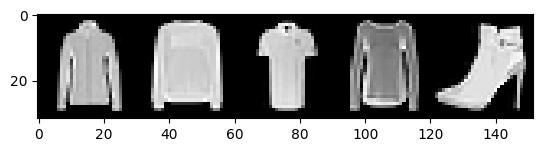

Labels Coat   Pullover T-shirt/top Shirt  Ankle boot


In [74]:
import matplotlib.pyplot as plt
import torchvision.transforms as transformers

classes = fashion_mnist_train.classes
print(f"Classes: {classess}")



def imshow(img):
  img = img.numpy().transpose((1, 2, 0))
  plt.imshow(img)
  plt.show()

data_loader = torch.utils.data.DataLoader(fashion_mnist_train, batch_size=5, shuffle=True)
images, labels = next(iter(data_loader))

imshow(torchvision.utils.make_grid(images))

print("Labels", ' '.join(f'{classes[labels[j]]:6}' for j in range(5)))

In [75]:
from torch.utils.data import DataLoader, random_split

train_size = int(0.8 * len(fashion_mnist_train))
validation_size = len(fashion_mnist_train) - train_size
train_dataset, validation_dataset = random_split(fashion_mnist_train, [train_size, validation_size])

batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(fashion_mnist_test, batch_size=batch_size, shuffle=False)

Images shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])


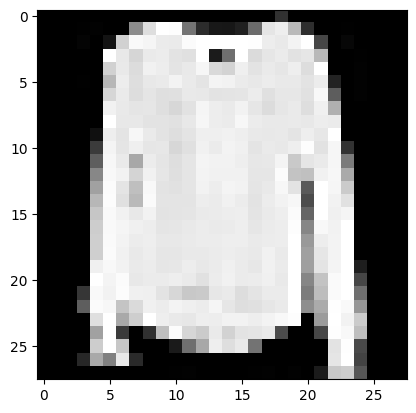

Label: Shirt


In [76]:
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

imshow(torchvision.utils.make_grid(images[0]))
print(f"Label: {classes[labels[0]]}")

# **Neural Network (Réseau de neuronnes)**

In [77]:
import os
from torch import nn


device = "cpu"

if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = "mps"
print('Using PyTorch version:', torch.__version__, ' Device:', device)

Using PyTorch version: 2.5.1+cu124  Device: cpu


In [78]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 784),
            nn.ReLU(),
            nn.Linear(784, 784),
            nn.ReLU(),
            nn.Linear(784, num_classes),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [79]:
from torch import optim

model_fashion = NeuralNetwork(28*28, 10).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_fashion.parameters())

In [80]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # On calcule de le taux d'erreur
        pred = model(X)
        loss = loss_fn(pred, y)

        # On réduit l'erreur
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [81]:
def validate(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  validation_loss, correct = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      validation_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  validation_loss /= num_batches
  correct /= size
  print(f"Erreur sur la validation: \n Accuracy(Moyenne): {(100*correct):>0.1f}%, Avg loss (Perte moyenne): {validation_loss:>8f} \n")


In [82]:
epoch = 7
for epoch in range(epoch):
  print(f"Epoch {epoch+1}\n-------------------------------")
  train(train_dataloader, model_fashion, loss_fn, optimizer)
  validate(validation_dataloader, model_fashion, loss_fn)
print("Fin de l'entrainement !!!")

Epoch 1
-------------------------------
loss: 2.298834  [    0/48000]
loss: 0.537223  [ 6400/48000]
loss: 0.571894  [12800/48000]
loss: 0.379529  [19200/48000]
loss: 0.453331  [25600/48000]
loss: 0.345228  [32000/48000]
loss: 0.361561  [38400/48000]
loss: 0.432207  [44800/48000]
Erreur sur la validation: 
 Accuracy(Moyenne): 85.4%, Avg loss (Perte moyenne): 0.400474 

Epoch 2
-------------------------------
loss: 0.320773  [    0/48000]
loss: 0.238551  [ 6400/48000]
loss: 0.460302  [12800/48000]
loss: 0.457798  [19200/48000]
loss: 0.384566  [25600/48000]
loss: 0.337709  [32000/48000]
loss: 0.438342  [38400/48000]
loss: 0.209053  [44800/48000]
Erreur sur la validation: 
 Accuracy(Moyenne): 87.6%, Avg loss (Perte moyenne): 0.345813 

Epoch 3
-------------------------------
loss: 0.273282  [    0/48000]
loss: 0.391486  [ 6400/48000]
loss: 0.272003  [12800/48000]
loss: 0.401146  [19200/48000]
loss: 0.536404  [25600/48000]
loss: 0.390910  [32000/48000]
loss: 0.299411  [38400/48000]
loss: 0.

In [83]:
def test(data_loader, model):
  size = len(data_loader.dataset)
  num_batches = len(data_loader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size
  print(f"Erreur sur le test: \n Accuracy(Moyenne): {(100*correct):>0.1f}%, Avg loss (Perte moyenne): {test_loss:>8f} \n")

test(test_loader, model_fashion)

Erreur sur le test: 
 Accuracy(Moyenne): 88.2%, Avg loss (Perte moyenne): 0.332470 



# **Overfitting**

In [88]:
from torchvision import transforms
from torch.utils.data import Subset

transform_augment = transforms.Compose([
    # transforms.RandomHorizontalFlip(),
    # transforms.RandomRotation(10),
    transforms.ToTensor(),
])

In [89]:
mnist_training = datasets.FashionMNIST(
    root="data/FashionMNIST",
    train=True,
    download=True,
    transform=transform_augment
)

mnist_test = datasets.FashionMNIST(
    root="data/FashionMNIST",
    train=False,
    download=True,
    transform=transform_augment
)

mnist_training_subset = Subset(mnist_training, range(1000))

In [90]:
batch_size = 64
mnist_train_subset_loader = DataLoader(mnist_training_subset, batch_size=batch_size, shuffle=True)
mnist_train_loader = DataLoader(mnist_training, batch_size=batch_size, shuffle=True)
mnist_test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

model_mnist = NeuralNetwork(28*28, 10).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer_mnist = optim.Adam(model_mnist.parameters())

In [91]:
epochs = 40
for epoch in range(epochs):
  print("Training on MNIST : ")
  train(mnist_train_subset_loader, model_mnist, loss_fn, optimizer_mnist)
  validate(mnist_test_loader, model_mnist, loss_fn)

print("Training done !!!")

Training on MNIST : 
loss: 2.309576  [    0/ 1000]
Erreur sur la validation: 
 Accuracy(Moyenne): 67.0%, Avg loss (Perte moyenne): 0.912603 

Training on MNIST : 
loss: 0.906549  [    0/ 1000]
Erreur sur la validation: 
 Accuracy(Moyenne): 72.4%, Avg loss (Perte moyenne): 0.758387 

Training on MNIST : 
loss: 0.837901  [    0/ 1000]
Erreur sur la validation: 
 Accuracy(Moyenne): 71.9%, Avg loss (Perte moyenne): 0.776741 

Training on MNIST : 
loss: 0.591795  [    0/ 1000]
Erreur sur la validation: 
 Accuracy(Moyenne): 76.5%, Avg loss (Perte moyenne): 0.664771 

Training on MNIST : 
loss: 0.611762  [    0/ 1000]
Erreur sur la validation: 
 Accuracy(Moyenne): 77.8%, Avg loss (Perte moyenne): 0.625262 

Training on MNIST : 
loss: 0.301646  [    0/ 1000]
Erreur sur la validation: 
 Accuracy(Moyenne): 79.4%, Avg loss (Perte moyenne): 0.598182 

Training on MNIST : 
loss: 0.285444  [    0/ 1000]
Erreur sur la validation: 
 Accuracy(Moyenne): 77.8%, Avg loss (Perte moyenne): 0.641111 

Traini

# **Fixing Overfitting**

In [92]:
class NeuralNetwork(nn.Module) :
  def __init__(self, input_size, num_classes) :
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(input_size, 784),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(784, 784),
        nn.ReLU(),
        nn.Linear(784, num_classes)
    )

  def forward(self, x) :
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model_mnist_fix = NeuralNetwork(28*28, 10).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer_mnist = optim.Adam(model_mnist.parameters())


In [93]:
for epoch in range(epochs):
  print("Training on MNIST : ")
  train(mnist_train_subset_loader, model_mnist_fix, loss_fn, optimizer_mnist)
  validate(mnist_test_loader, model_mnist_fix, loss_fn)

print("Training done !")

Training on MNIST : 
loss: 2.284938  [    0/ 1000]
Erreur sur la validation: 
 Accuracy(Moyenne): 7.6%, Avg loss (Perte moyenne): 2.300304 

Training on MNIST : 
loss: 2.289069  [    0/ 1000]
Erreur sur la validation: 
 Accuracy(Moyenne): 7.6%, Avg loss (Perte moyenne): 2.300304 

Training on MNIST : 
loss: 2.290102  [    0/ 1000]
Erreur sur la validation: 
 Accuracy(Moyenne): 7.6%, Avg loss (Perte moyenne): 2.300304 

Training on MNIST : 
loss: 2.299740  [    0/ 1000]
Erreur sur la validation: 
 Accuracy(Moyenne): 7.6%, Avg loss (Perte moyenne): 2.300304 

Training on MNIST : 
loss: 2.303915  [    0/ 1000]
Erreur sur la validation: 
 Accuracy(Moyenne): 7.6%, Avg loss (Perte moyenne): 2.300304 

Training on MNIST : 
loss: 2.285142  [    0/ 1000]
Erreur sur la validation: 
 Accuracy(Moyenne): 7.6%, Avg loss (Perte moyenne): 2.300304 

Training on MNIST : 
loss: 2.291877  [    0/ 1000]
Erreur sur la validation: 
 Accuracy(Moyenne): 7.6%, Avg loss (Perte moyenne): 2.300304 

Training on M

# **Basic Convolutional Neural Networks**

In [94]:
class MyFirstCNN(nn.Module) :
    def __init__(self) :
        super(MyFirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [95]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

full_trainset = datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transforms
  )

testset = datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transforms
  )

num_train = len(full_trainset)
num_validation = int(num_train * 0.1)
num_train -= num_validation

trainset, validationset = random_split(full_trainset, [num_train, num_validation])

train_loader = DataLoader( trainset,  batch_size=64, shuffle=True)
validation_loader = DataLoader( validationset,  batch_size=64, shuffle=False)
test_loader = DataLoader( testset,  batch_size=64, shuffle=False)


100%|██████████| 170M/170M [00:04<00:00, 38.8MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [96]:
model_simple_cnn = MyFirstCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer_cnn = optim.Adam(model_simple_cnn.parameters(), lr=0.001)

In [97]:
epochs = 20

for epoch in range(epochs):
  print("Training on CIFAR10 : ")
  train(train_loader, model_simple_cnn, criterion, optimizer_cnn)
  validate(validation_loader, model_simple_cnn, criterion)

print("Training done !!!")

Training on CIFAR10 : 
loss: 2.303574  [    0/45000]
loss: 1.741824  [ 6400/45000]
loss: 1.523627  [12800/45000]
loss: 1.357617  [19200/45000]
loss: 1.321570  [25600/45000]
loss: 1.249803  [32000/45000]
loss: 1.229754  [38400/45000]
loss: 1.100990  [44800/45000]
Erreur sur la validation: 
 Accuracy(Moyenne): 60.2%, Avg loss (Perte moyenne): 1.090437 

Training on CIFAR10 : 
loss: 1.170870  [    0/45000]
loss: 1.203629  [ 6400/45000]
loss: 1.094683  [12800/45000]
loss: 0.790514  [19200/45000]
loss: 0.999601  [25600/45000]
loss: 0.869458  [32000/45000]
loss: 1.001105  [38400/45000]
loss: 0.807337  [44800/45000]
Erreur sur la validation: 
 Accuracy(Moyenne): 66.6%, Avg loss (Perte moyenne): 0.935517 

Training on CIFAR10 : 
loss: 0.718542  [    0/45000]
loss: 0.648014  [ 6400/45000]
loss: 0.762131  [12800/45000]
loss: 0.820669  [19200/45000]
loss: 0.764621  [25600/45000]
loss: 1.076470  [32000/45000]
loss: 0.927492  [38400/45000]
loss: 0.527644  [44800/45000]
Erreur sur la validation: 
 A

KeyboardInterrupt: 

In [98]:
test(test_loader, model_simple_cnn)

Erreur sur le test: 
 Accuracy(Moyenne): 73.0%, Avg loss (Perte moyenne): 0.774165 



# **Object detection with YOLO**

In [99]:
import torchvision.transforms as T
from PIL import Image

def load_yolo_model():
  model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
  model.eval()
  return model

def detect_objects(model, image_path):
  image = Image.open(image_path)
  results = model(image)
  return results

def display_results(results):
  results.print()

  results.show()
  df = results.pandas().xyxy[0]
  print(df)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-3-4 Python-3.11.11 torch-2.5.1+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 188x269 2 persons, 1 knife, 1 bowl
Speed: 4.5ms pre-process, 287.1ms inference, 1.5ms NMS per image at shape (1, 3, 448, 640)


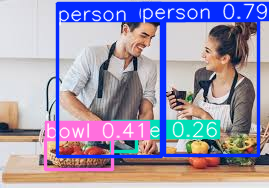

         xmin        ymin        xmax        ymax  confidence  class    name
0  164.217682   20.433031  258.236359  155.338211    0.790011      0  person
1   57.779667    3.172474  161.690750  156.498917    0.777957      0  person
2   45.299091  139.947525  112.892632  169.023300    0.412960     45    bowl
3  111.255844  138.906906  136.859375  151.337219    0.259081     43   knife


In [102]:

model = load_yolo_model()

#image_path = "/content/SuperBowl.jpeg"
#image_path = "/content/Can2023.jpeg"
image_path = "/content/CuisineIMG.jpeg"

results = detect_objects(model, image_path)

display_results(results)

In [106]:
# Semantic with DEEPLAB
from torchvision.models.segmentation import deeplabv3_resnet101
from PIL import Image
%matplotlib inline


def load_deeplab_model(pretrained=True, num_classes=21):
  model = deeplabv3_resnet101(pretrained=pretrained)
  model.eval()
  return model

def segment_image(image_path, model):
  image = Image.open(image_path)
  transform = T.Compose([
      T.Resize(256),
      T.CenterCrop(224),
      T.ToTensor(),
      T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
  ])
  input_tensor = transform(image).unsqueeze(0)

  with torch.no_grad():
    output = model(input_tensor)['out'][0]
  return output

def display_segmentation(image_path, output):
  image = Image.open(image_path)
  output = output.argmax(0)
  plt.figure(figsize=(20, 10))
  plt.subplot(1, 2, 1)
  plt.imshow(image)
  plt.title('Original Image')
  plt.subplot(1, 2, 2)
  plt.imshow(output.numpy())
  plt.title('Segmentation Map')
  plt.colorbar()
  plt.show()

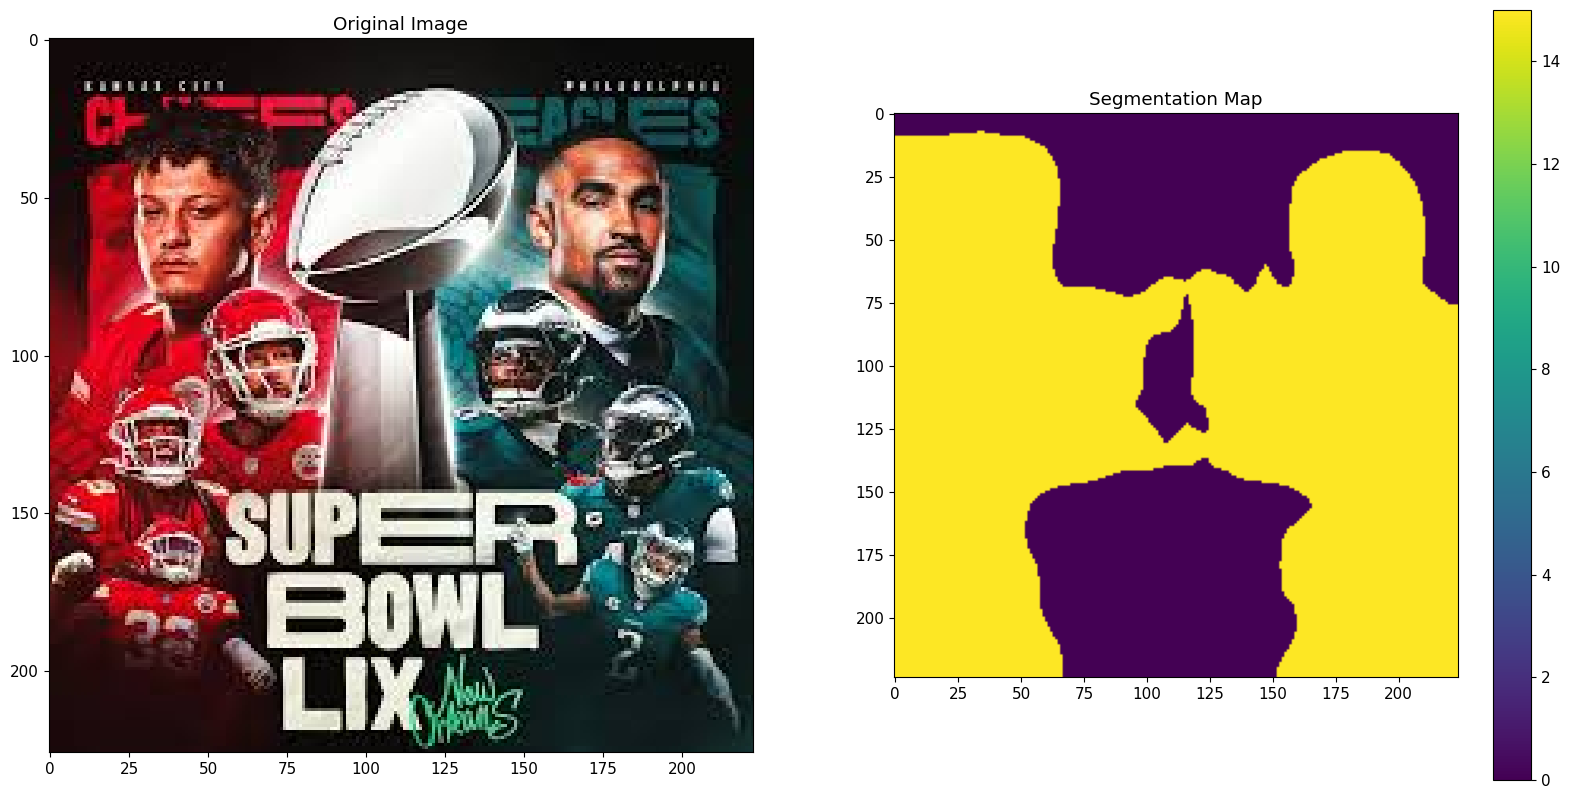

In [116]:
model = load_deeplab_model()

image_path = "/content/SuperBowl.jpeg"
#image_path = "/content/Can2023.jpeg"
#image_path = "/content/CuisineIMG.jpeg"


output = segment_image(image_path, model)

display_segmentation(image_path, output)

In [110]:
# Pose Estimation with Keypoint RCNN
from torchvision.models.detection import keypointrcnn_resnet50_fpn, KeypointRCNN_ResNet50_FPN_Weights
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt


def load_pose_model():
  weights = KeypointRCNN_ResNet50_FPN_Weights.DEFAULT
  model = keypointrcnn_resnet50_fpn(weights=weights)
  model.eval()
  return model

def estimate_pose(image_path, model):
  image = Image.open(image_path).convert("RGB")

  image_tensor = T.functional.to_tensor(image).unsqueeze(0)

  with torch.no_grad():
    predictions = model(image_tensor)

  keypoints = predictions[0]['keypoints']
  keypoints_scores = predictions[0]['keypoints_scores']
  return keypoints, keypoints_scores


def display_pose_estimation(image_path, keypoints, keypoints_scores):
  image = Image.open(image_path)
  plt.figure(figsize=(12, 12))
  plt.imshow(image)
  plt.axis('off')

  ax = plt.gca()
  threshold = 2.0 # Define threshold here

  for kp, kp_score in zip(keypoints, keypoints_scores): # Remove threshold from zip
    kp = kp.cpu().detach().numpy()
    kp_score = kp_score.cpu().detach().numpy()
    for idx, (x, y, v) in enumerate(kp):
      if kp_score[idx] > threshold: # Use threshold for filtering here
        ax.add_patch(plt.Circle((x, y), radius=3, color='red', fill=True))
  plt.show()

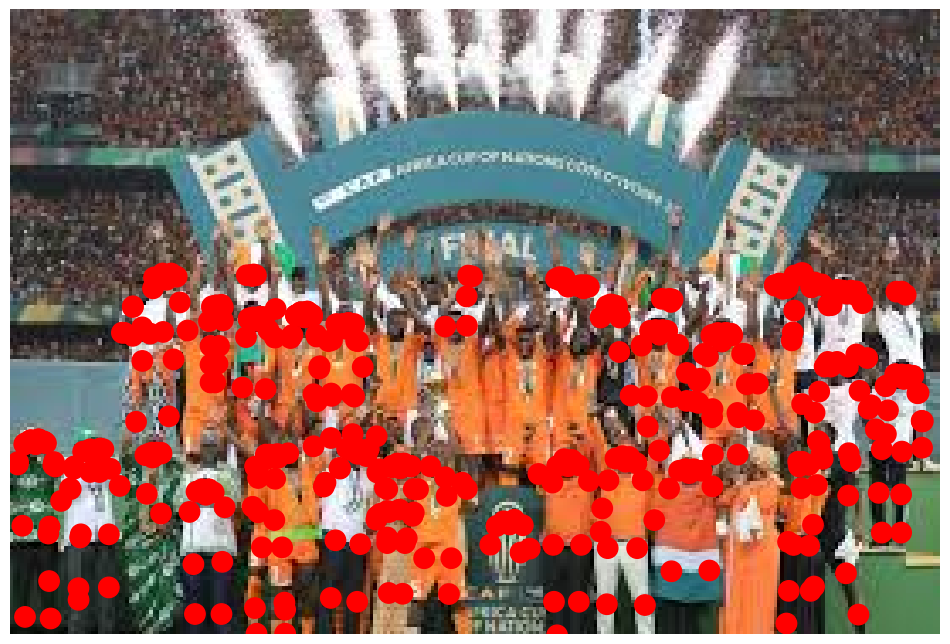

In [117]:
model = load_pose_model()

#image_path = "/content/SuperBowl.jpeg"
image_path = "/content/Can2023.jpeg"
#image_path = "/content/CuisineIMG.jpeg"

keypoints, keypoints_scores = estimate_pose(image_path, model)

display_pose_estimation(image_path, keypoints, keypoints_scores)